### Solving Poisson Equation on S^2: $\Delta u = f$


In [6]:
import my_ducc0_wrapper
from my_ducc0_wrapper import *

In [3]:
import torch

from Basis import SPHBasis
from Problem import Problem_Sphere_Poisson
from Model import Model
from Net import Sphere_Net, SPH_Sphere_Net
import seaborn as sns
import matplotlib.pyplot as plt
import math
from math import pi
from spherical_harmonics import *
from torch.distributions.uniform import Uniform
from numpy import arccos
import numpy as np

import pyshtools
from pyshtools.shio import shread
from pyshtools.expand import MakeGridDH
# from pyshtools.expand import SHExpandDH
from pyshtools.spectralanalysis import spectrum

torch.manual_seed(0)
maxiter = 1000
problem = Problem_Sphere_Poisson()

In [4]:
N = 13
#             cos_azimuth = torch.linspace(-0.9999, 0.9999, N, requires_grad=False)
#             azimuth = torch.arccos(cos_azimuth)
azimuth = torch.linspace(0.0001, pi, N, requires_grad=False)
polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)

## noise
#             dpolar = 2*pi/(2*N-1)
#             dazimuth = 2.0/(N-1)
#             polar_noise = torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
#             azimuth_noise = torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(azimuth.shape))            
#             azimuth, polar = azimuth + azimuth_noise, polar + polar_noise

azimuth, polar = torch.meshgrid(azimuth, polar)
location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
location.shape

torch.Size([338, 2])

iteration 0: loss = 53.503902435302734


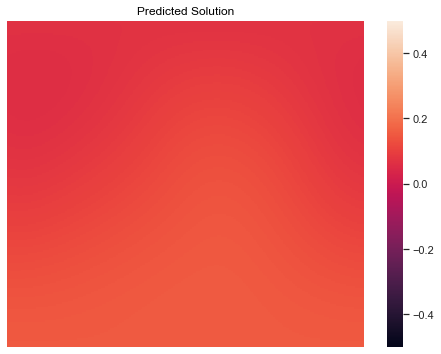

-----------------------------
[[[ 1.11176506e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-2.32649818e-02 -1.33291110e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.43942981e-04 -2.22559203e-03 -9.58632503e-04 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 4.82631313e-09  1.25784553e-07  3.78607284e-10 ...  9.95727945e-08
    0.00000000e+00  0.00000000e+00]
  [-3.60649821e-09 -1.24136989e-07  1.31244815e-09 ...  9.91938087e-09
    9.91991627e-08  0.00000000e+00]
  [ 4.75503015e-09  1.22522380e-07  3.91764787e-10 ...  6.77002419e-08
    9.90270532e-09  9.90024134e-08]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -6.51366869e-03  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -1.96136301e-03  9.50111425e-04 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

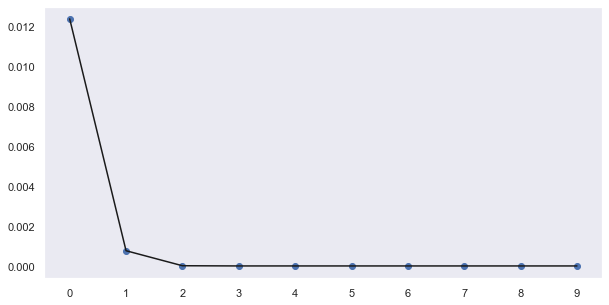

iteration 10: loss = 53.46963882446289
iteration 20: loss = 53.46663284301758
iteration 30: loss = 53.46515655517578
iteration 40: loss = 53.464420318603516
iteration 50: loss = 53.46321487426758
iteration 60: loss = 53.46003341674805
iteration 70: loss = 53.44099426269531
iteration 80: loss = 53.23370361328125
iteration 90: loss = 50.8060188293457
iteration 100: loss = 46.146846771240234


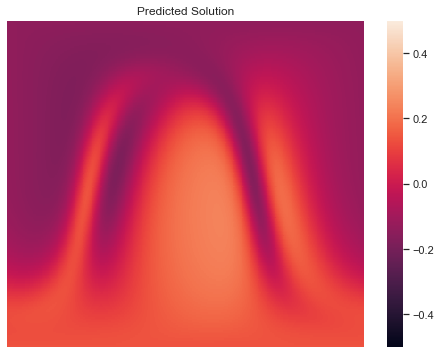

-----------------------------
[[[ 8.13440420e-03  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-6.86090812e-02 -7.09251612e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-4.41463944e-03  9.68044158e-03  7.34407874e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 1.45963632e-08  9.26979055e-07  6.48168310e-08 ...  7.13074996e-07
    0.00000000e+00  0.00000000e+00]
  [-1.54754112e-08 -9.14838267e-07 -6.37594155e-08 ... -7.14844219e-08
    7.11639586e-07  0.00000000e+00]
  [ 1.37541250e-08  9.03883347e-07  5.99448384e-08 ...  5.05210267e-07
   -7.14540036e-08  7.09657172e-07]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -3.56388725e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -1.65188697e-03 -2.93259695e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

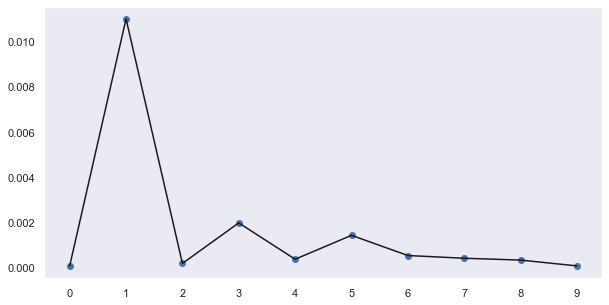

iteration 110: loss = 43.52044677734375
iteration 120: loss = 41.8084716796875
iteration 130: loss = 39.80412673950195
iteration 140: loss = 36.502685546875
iteration 150: loss = 33.395774841308594
iteration 160: loss = 29.8743953704834
iteration 170: loss = 26.04928970336914
iteration 180: loss = 20.494125366210938
iteration 190: loss = 15.40643310546875
iteration 200: loss = 12.715527534484863


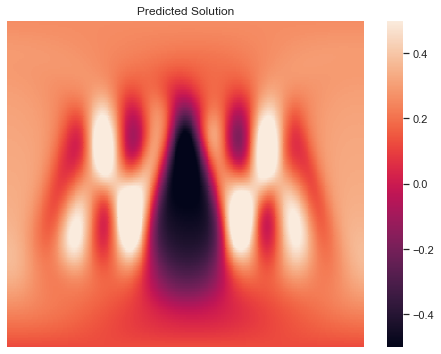

-----------------------------
[[[ 1.90825790e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.52055824e-02  1.22065395e-01  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-1.24037464e-03 -2.57307440e-02 -1.09842479e-01 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 6.65859101e-09 -3.72782779e-06 -3.66841348e-08 ...  4.00104767e-08
    0.00000000e+00  0.00000000e+00]
  [-1.01925517e-08  3.68105657e-06  3.05030987e-08 ... -3.70618061e-08
    3.79658083e-08  0.00000000e+00]
  [ 7.44740491e-09 -3.63623349e-06 -3.37767361e-08 ...  5.79291921e-08
   -3.57436925e-08  4.04194083e-08]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -3.15081241e-04  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -1.83287123e-03 -8.68116599e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

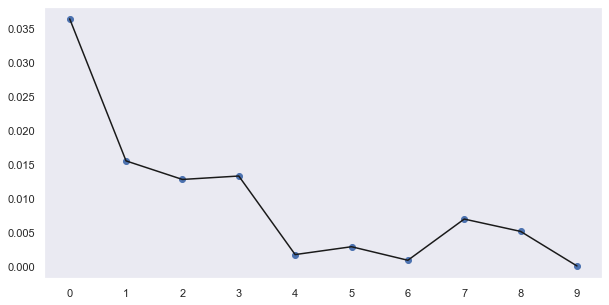

iteration 210: loss = 10.320113182067871
iteration 220: loss = 7.978044033050537
iteration 230: loss = 5.31148099899292
iteration 240: loss = 2.735447883605957
iteration 250: loss = 1.6710312366485596
iteration 260: loss = 1.1460728645324707
iteration 270: loss = 0.9001944065093994
iteration 280: loss = 0.752461314201355
iteration 290: loss = 0.6545128226280212
iteration 300: loss = 0.5755659341812134


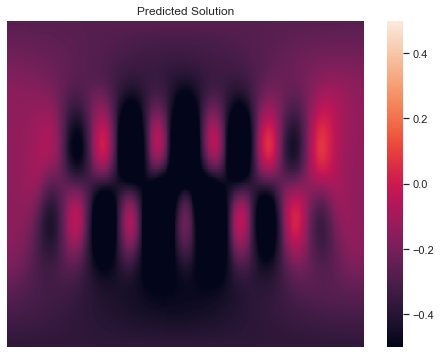

-----------------------------
[[[-3.31108093e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 4.02929373e-02  1.34275064e-01  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 4.86332178e-03 -6.31776755e-04 -1.24805626e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 2.04315009e-09 -1.93542405e-06  2.60261535e-10 ...  7.26539113e-08
    0.00000000e+00  0.00000000e+00]
  [-1.07455707e-08  1.91200070e-06 -9.71457315e-09 ... -4.05904608e-08
    7.04195315e-08  0.00000000e+00]
  [ 4.56556748e-09 -1.88723016e-06 -1.46254819e-09 ...  1.36671488e-07
   -3.86572943e-08  6.84538790e-08]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -2.45509576e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  5.31494617e-04 -8.16298369e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

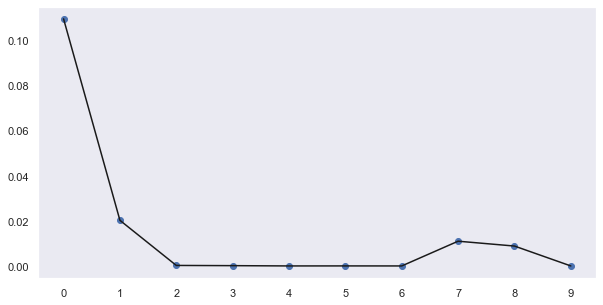

iteration 310: loss = 0.5052675604820251
iteration 320: loss = 0.4407343566417694
iteration 330: loss = 0.38448891043663025
iteration 340: loss = 0.3429246246814728
iteration 350: loss = 0.3139200806617737
iteration 360: loss = 0.2926013767719269
iteration 370: loss = 0.27556315064430237
iteration 380: loss = 0.26181647181510925
iteration 390: loss = 0.2497164011001587
iteration 400: loss = 0.23958855867385864


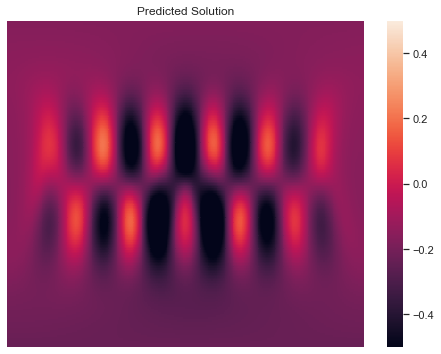

-----------------------------
[[[-1.96968555e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.62520537e-02  5.78932464e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [-1.48873043e-03  6.90106302e-04 -1.99082084e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 1.34291922e-09 -7.87550164e-07 -3.13720916e-09 ... -1.69129535e-07
    0.00000000e+00  0.00000000e+00]
  [-4.50443327e-09  7.78183221e-07 -3.23733457e-10 ... -5.66659111e-08
   -1.71294531e-07  0.00000000e+00]
  [ 2.55203436e-09 -7.68642280e-07 -3.14898885e-09 ... -6.82917474e-08
   -5.49496129e-08 -1.72500066e-07]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.46487579e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  2.01353757e-03  1.00846705e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

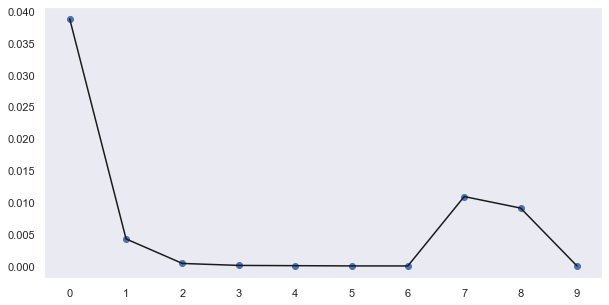

iteration 410: loss = 0.2305542230606079
iteration 420: loss = 0.22252289950847626
iteration 430: loss = 0.21517591178417206
iteration 440: loss = 0.2084473818540573
iteration 450: loss = 0.20206661522388458
iteration 460: loss = 0.1961394101381302
iteration 470: loss = 0.19039860367774963
iteration 480: loss = 0.18491168320178986
iteration 490: loss = 0.17950892448425293
iteration 500: loss = 0.17431549727916718


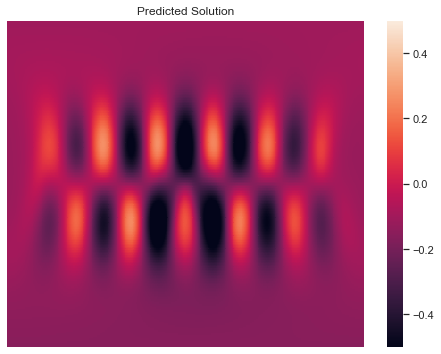

-----------------------------
[[[-1.31464466e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.12710109e-02  4.04161513e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 5.37819404e-04 -8.30514589e-04 -1.73360556e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 1.60853525e-10 -5.54408189e-07 -6.69212374e-09 ... -5.08930960e-08
    0.00000000e+00  0.00000000e+00]
  [-1.84698945e-09  5.47493300e-07  3.77621001e-09 ... -1.57513512e-07
   -5.12328597e-08  0.00000000e+00]
  [-6.13945728e-10 -5.40435906e-07 -6.77979539e-09 ...  1.07470495e-08
   -1.56249655e-07 -5.37085576e-08]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.46491844e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  2.87492713e-03  1.50896062e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

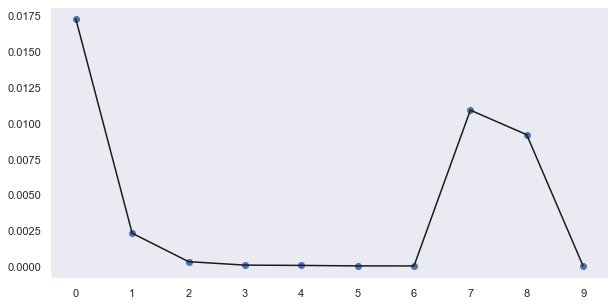

iteration 510: loss = 0.16929836571216583
iteration 520: loss = 0.16442357003688812
iteration 530: loss = 0.15966729819774628
iteration 540: loss = 0.1549026221036911
iteration 550: loss = 0.15032245218753815
iteration 560: loss = 0.14566852152347565
iteration 570: loss = 0.14104345440864563
iteration 580: loss = 0.13625428080558777
iteration 590: loss = 0.13138584792613983
iteration 600: loss = 0.12630747258663177


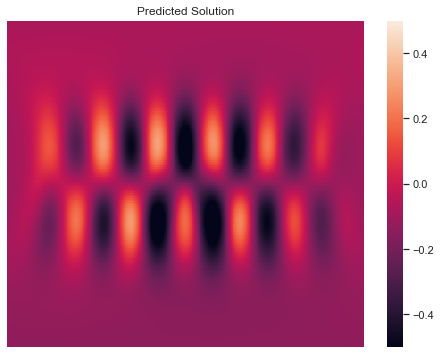

-----------------------------
[[[-1.12587288e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.31739990e-02  2.97891162e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.57043920e-03 -8.60921398e-04 -1.34612741e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 2.16250767e-11 -4.13327683e-07 -8.31043145e-09 ... -4.57279356e-07
    0.00000000e+00  0.00000000e+00]
  [-1.70712922e-09  4.08030644e-07  5.49833645e-09 ... -2.62922669e-07
   -4.56957792e-07  0.00000000e+00]
  [-4.49556670e-10 -4.03110846e-07 -7.89904675e-09 ... -2.96383234e-07
   -2.58957868e-07 -4.57132074e-07]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  2.49526594e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  3.44473193e-03  4.22905944e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

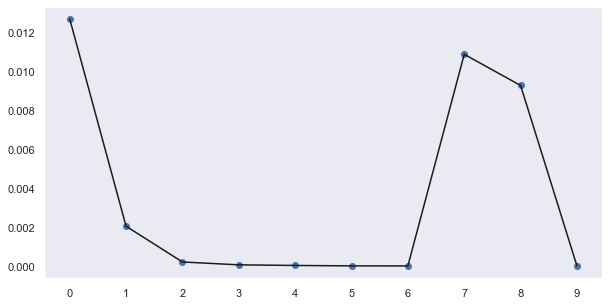

iteration 610: loss = 0.12102331221103668
iteration 620: loss = 0.11533624678850174
iteration 630: loss = 0.10967583954334259
iteration 640: loss = 0.10408613830804825
iteration 650: loss = 0.09857790917158127
iteration 660: loss = 0.09303364902734756
iteration 670: loss = 0.08769585192203522
iteration 680: loss = 0.08235391974449158
iteration 690: loss = 0.07730519771575928
iteration 700: loss = 0.07265087217092514


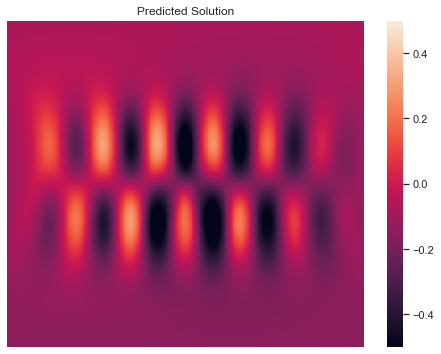

-----------------------------
[[[-1.20194219e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.64569782e-02  2.33360399e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.38724449e-03 -6.59821148e-04 -1.06887463e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 2.63962463e-10 -3.31766927e-07 -7.29534699e-09 ... -1.69384498e-06
    0.00000000e+00  0.00000000e+00]
  [-2.51662824e-09  3.27420764e-07  6.65465327e-09 ... -3.46883439e-07
   -1.69042323e-06  0.00000000e+00]
  [ 7.55481289e-10 -3.22222434e-07 -8.28433411e-09 ... -1.24224482e-06
   -3.40760920e-07 -1.68651297e-06]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  3.98323834e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  5.73329767e-03  9.14080348e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

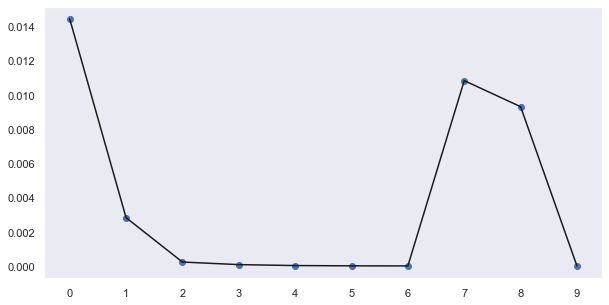

iteration 710: loss = 0.06837290525436401
iteration 720: loss = 0.06418321281671524
iteration 730: loss = 0.06053677201271057
iteration 740: loss = 0.05724139139056206
iteration 750: loss = 0.05437888577580452
iteration 760: loss = 0.05169190838932991
iteration 770: loss = 0.04931848123669624
iteration 780: loss = 0.047036703675985336
iteration 790: loss = 0.045001715421676636
iteration 800: loss = 0.04300519824028015


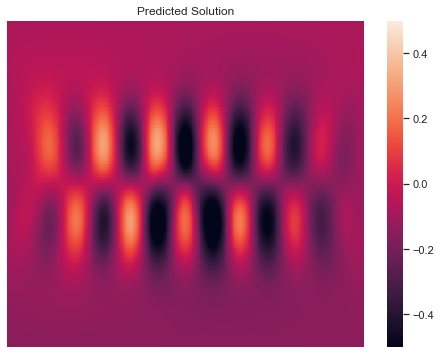

-----------------------------
[[[-1.19172074e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.61416938e-02  2.67218929e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.99938140e-03 -1.68372574e-03 -1.04178051e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-1.24230570e-09 -3.70248927e-07 -6.54387078e-09 ... -1.75557932e-06
    0.00000000e+00  0.00000000e+00]
  [-8.57328875e-10  3.65743517e-07  4.18348600e-09 ... -1.06595337e-07
   -1.75034904e-06  0.00000000e+00]
  [-4.76135520e-10 -3.60521057e-07 -6.33311714e-09 ... -1.35400353e-06
   -1.01267496e-07 -1.74614991e-06]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  3.98520418e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  5.88126294e-03  8.91865138e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

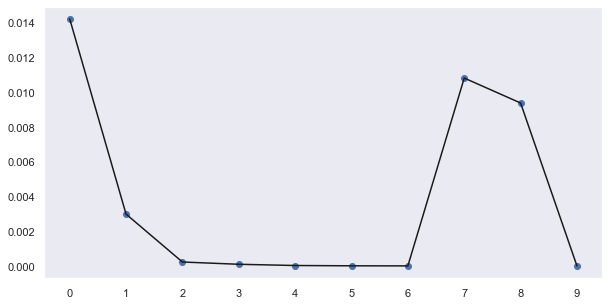

iteration 810: loss = 0.04104208946228027
iteration 820: loss = 0.03906102478504181
iteration 830: loss = 0.03703010827302933
iteration 840: loss = 0.03502462059259415
iteration 850: loss = 0.032674141228199005
iteration 860: loss = 0.02994789369404316
iteration 870: loss = 0.026931116357445717
iteration 880: loss = 0.024959249421954155
iteration 890: loss = 0.02141243778169155
iteration 900: loss = 0.01766064018011093


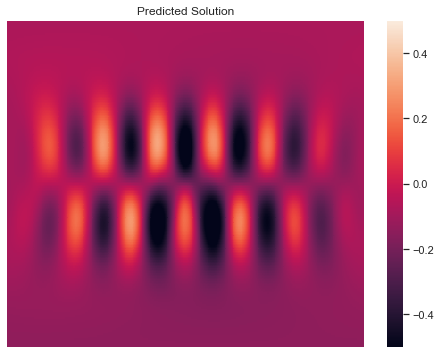

-----------------------------
[[[-1.13943346e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.39837747e-02  2.71618310e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.96598556e-03 -4.91133286e-03 -1.13090184e-02 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-9.15094889e-10 -4.05509070e-07 -4.25135127e-09 ... -1.02971103e-06
    0.00000000e+00  0.00000000e+00]
  [-9.17590615e-10  3.99859175e-07  2.15934270e-09 ...  1.48668235e-07
   -1.02487581e-06  0.00000000e+00]
  [-1.35621869e-09 -3.95097885e-07 -3.78957221e-09 ... -7.89490969e-07
    1.54025088e-07 -1.02262629e-06]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  2.54401583e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  4.03321348e-03  4.27865284e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

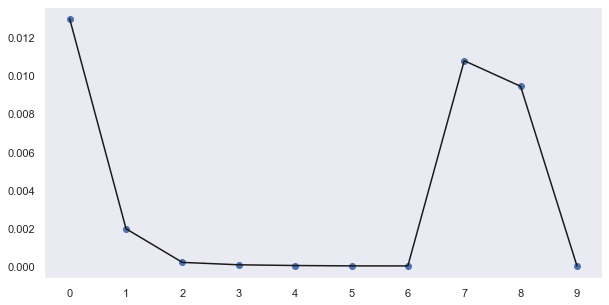

iteration 910: loss = 0.015507723204791546
iteration 920: loss = 0.013471323996782303
iteration 930: loss = 0.015533647499978542
iteration 940: loss = 0.010463086888194084
iteration 950: loss = 0.009689542464911938
iteration 960: loss = 0.008578004315495491
iteration 970: loss = 0.0077230054885149
iteration 980: loss = 0.007056462112814188
iteration 990: loss = 0.0065332334488630295


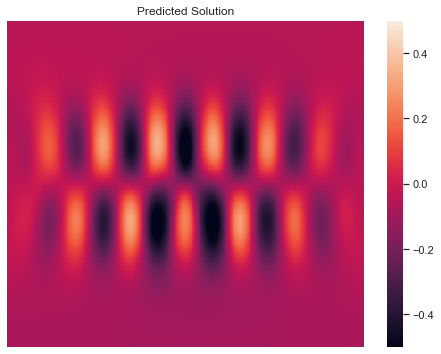

-----------------------------
[[[-6.99827895e-02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 1.41958231e-02  3.00734993e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 2.17129174e-03 -6.31622411e-03 -9.92835592e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-4.75204542e-10 -4.62956450e-07 -4.87983476e-09 ... -6.63338369e-07
    0.00000000e+00  0.00000000e+00]
  [-3.19818672e-10  4.56817418e-07  2.31642039e-09 ...  2.62687053e-07
   -6.61071567e-07  0.00000000e+00]
  [-8.79835149e-10 -4.52130706e-07 -3.71186681e-09 ... -4.74139341e-07
    2.67410201e-07 -6.58100191e-07]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.20628569e-02  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  2.01997720e-03  1.49731420e-03 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]

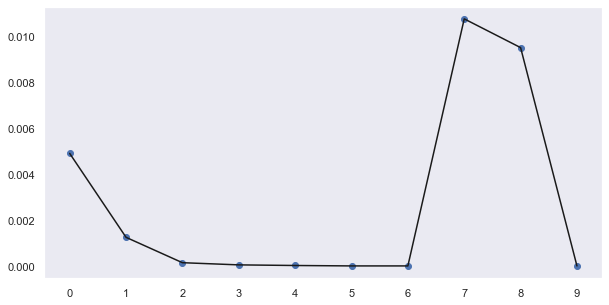

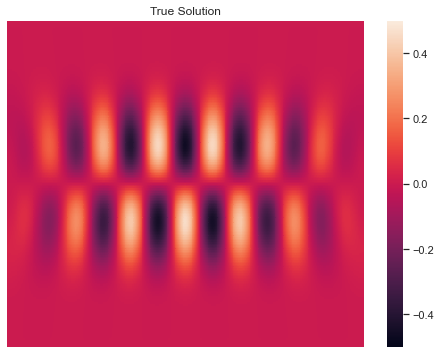

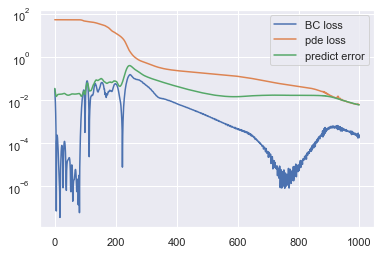

In [5]:

def construct_model(net):
    class Poisson1dModel(Model):
        def add_loss_history(self):
            self.loss_history.append([self.bc_loss, self.pde_loss, self.predict_error_value])

        def __init__(self):
            super().__init__(problem=problem, net=net, maxiter=maxiter)

        def inner_sample(self, N=15):
#             N = 25
#             cos_azimuth = torch.linspace(-0.9999, 0.9999, N, requires_grad=False)
#             azimuth = torch.arccos(cos_azimuth)
            azimuth = torch.linspace(0.0001, pi, N, requires_grad=False)
            polar = torch.linspace(0, 2*pi, 2*N, requires_grad=False)
            
            ## noise
#             dpolar = 2*pi/(2*N-1)
#             dazimuth = 2.0/(N-1)
#             polar_noise = torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
#             azimuth_noise = torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(azimuth.shape))            
#             azimuth, polar = azimuth + azimuth_noise, polar + polar_noise

            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            return location
#             x = torch.randn(num, 3)
#             x = x / (torch.norm(x, dim=1).reshape((-1, 1)))
        
#             polar = torch.atan(x[:, :1] / x[:, 1:2]) + math.pi / 2
#             polar[:num // 2, 0] = polar[:num // 2, 0] + math.pi
#             azimuth = torch.acos(x[:, 2:3])
            
#             ## noise
#             dpolar = 2 * pi/(num-1) 
#             polar_noise = polar + torch.distributions.Uniform(low = -dpolar/2, high = dpolar/2).sample(sample_shape=torch.Size(polar.shape))
            
#             dazimuth = pi/(num-1) 
#             azimuth_noise = azimuth + torch.distributions.Uniform(low = -dazimuth/2, high = dazimuth/2).sample(sample_shape=torch.Size(polar.shape))            
            
#             x = torch.cat([azimuth_noise, polar_noise], dim=1)
#             return x

        def bc_sample(self):
            return torch.tensor([[1., 1.]])

        def init_sample(self):
            pass

        def plot(self, net):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = net(location)
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("Predicted Solution")
            plt.show()
            
            self.spherical_harmonic_transform(net)
        
        def spherical_harmonic_transform(self, net):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            function_grid = net(location)
            function_grid = function_grid.reshape((200, 400))
            
#             print(f'grid dims{function_grid}')
            
            ## if flag = True, compute adjoint instead
            coefficients = SHExpandDH(function_grid.detach().numpy(), sampling=2,flag = False)
            print("-----------------------------")
            print(coefficients)
            print("-----------------------------")
            nl = coefficients.shape[1]
            ls = np.arange(nl)[:10]
#             print(ls)

            power_per_l = spectrum(coefficients)[:10]
#             print(power_per_l)
            fig, ax = plt.subplots(1, 1, figsize=(len(ls), 5))
            ax.plot(ls, power_per_l, 'bo')
            ax.plot(ls, power_per_l, 'k-')
            plt.xticks(range(len(ls)))
            # ax.set_yscale('log')
            # ax.set_xscale('log')
            ax.grid()
            plt.show()
            
        
        def plot_true(self):
            azimuth = torch.linspace(0, math.pi, 200, requires_grad=False)
            polar = torch.linspace(0, 2 * math.pi, 400, requires_grad=False)
            azimuth, polar = torch.meshgrid(azimuth, polar)
            location = torch.cat([azimuth.reshape(-1, 1), polar.reshape(-1, 1)], dim=1)
            value = true_solution(location[:, 0:1], location[:, 1:])
            
            value = value.reshape((200, 400))
            
            fig, ax = plt.subplots(1, 1, figsize=(8, 6))
            sns.set()
            sns.heatmap(value.detach().numpy(), ax=ax, vmin=-0.5, vmax=0.5, cbar=True)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title("True Solution")
            plt.show()
            
        def post_process(self, ax=None):
            if ax is None:
                plt.plot(self.loss_history)
                plt.yscale('log')
                plt.legend(('BC loss', 'pde loss', 'predict error'))
                plt.show()
            else:
                ax.plot(self.loss_history)
                ax.set_yscale('log')
                ax.set_ylim(1e-4, 100)
                ax.legend(('BC loss', 'pde loss', 'predict error'))

        def predict_error(self):
            coor = self.inner_sample(N=20)
            true = self.problem.ground_truth(coor)
            predict = self.net(coor)
            predict_error = self.pde_loss_f(true, predict)
            return predict_error

        def train(self, ax100=None):
            problem = self.problem
            net = self.net
            opt = self.opt
            maxiter = self.maxiter

            for iter in range(maxiter):
                net.zero_grad()

                coor_inner = self.inner_sample().detach().requires_grad_(True)
                infer_value_inner = net(coor_inner)
                truth_inner, predict_inner = problem.pde(coor_inner, infer_value_inner)
                self.pde_loss = self.pde_loss_f(predict_inner, truth_inner)

                bc_samples = self.bc_sample()
                if bc_samples is None:
                    self.bc_loss = torch.tensor(0.)
                else:
                    coor_bc = bc_samples.detach().requires_grad_(True)
                    infer_value_bc = net(coor_bc)
                    truth_bc, predict_bc = problem.bound_condition(coor_bc, infer_value_bc)
                    self.bc_loss = self.bc_loss_f(predict_bc, truth_bc)

                init_samples = self.init_sample()
                if init_samples is None:
                    self.init_loss = torch.tensor(0.)
                else:
                    coor_init = init_samples.detach().requires_grad_(True)
                    infer_value_init = net(coor_init)
                    truth_init, predict_init = problem.bound_condition(coor_init, infer_value_init)
                    self.init_loss = self.bc_loss_f(predict_init, truth_init)
                self.predict_error_value = self.predict_error()
                self.total_loss = self.pde_loss + self.bc_loss + self.init_loss
                self.add_loss_history()
                self.total_loss.backward()

                opt.step()
                opt.zero_grad()
                
                for i in range(len(self.loss_history)):
                    for j in range(3):
                        self.loss_history[i][j] = self.loss_history[i][j].detach().requires_grad_(False)
                        
                if iter % (maxiter // 100) == 0:
                    print("iteration {}: loss = {}".format(iter, self.total_loss))
                        
                if iter % int(maxiter / 10) == 0:
                    self.plot(net)
                
            self.plot(net)
            self.plot_true()
            self.post_process()

    return Poisson1dModel()

model = construct_model(Sphere_Net([3, 50, 50, 50, 16, 1]))
model.train()
